In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1.core import Laps
from datetime import datetime
from matplotlib.collections import LineCollection
from datetime import timedelta
from fastf1 import utils
import mplcyberpunk
from timple.timedelta import strftimedelta

In [3]:
year=int(input('Enter Year'))
gp=input('Enter the Grand Prix Location')
sessiontypechoice=int(input('Enter 1 for qualifying or 2 for race'))
if sessiontypechoice == 1:
    sessiontype='Q'
elif sessiontypechoice == 2:
    sessiontype='R'
else:
    print("Unknown choice")

session = ff1.get_session(year, gp,sessiontype)
session.load()

if sessiontype=="Q":
    choicedrivers=int(input("Enter 1 for the comparision between top 2 drivers \n Enter 2 for the comparision between 2 specified drivers"))
    if choicedrivers==1: 
        quali_results=session.results
        quali_results=quali_results[['DriverNumber','BroadcastName','Abbreviation','TeamName','Position','Q1','Q2','Q3']]
        quali_results[['Abbreviation']]
        x=quali_results['Abbreviation'].iloc[0]
        y=quali_results['Abbreviation'].iloc[1]
        driver1=x
        driver2=y

    else:
        driver1=input("Enter the first driver initials")
        driver2=input("Enter the second driver initials")
else:
    driver1=input("Enter the first driver initials")
    driver2=input("Enter the second driver initials")

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '63', '44', '10', '5', '14', '3', '4', '31'

In [4]:
laps=session.load_laps(with_telemetry=True)

laps_1=laps.pick_driver(driver1)
laps_2=laps.pick_driver(driver2)
if sessiontype == "Q":
    s1=laps_1.pick_fastest()
    s2=laps_2.pick_fastest()
    if s1.LapTime < s2.LapTime:
        fastest_1=s1
        fastest_2=s2
    else:
        fastest_1=s2
        fastest_2=s1
else:
    fastest_1=laps_1.pick_fastest()
    fastest_2=laps_2.pick_fastest()
    

c:\Users\Rajup\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading 

In [5]:
driver1=driver1.upper()
driver2=driver2.upper()

In [6]:
driver3="HAM"

laps_3=laps.pick_driver(driver3)
driver3_racetimes=pd.DataFrame(laps_3.pick_accurate())

In [7]:
driver3_racetimes

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
154,0 days 01:06:44.235000,44,0 days 00:01:50.521000,2,1,NaT,NaT,0 days 00:00:39.750000,0 days 00:00:44.816000,0 days 00:00:25.955000,...,False,MEDIUM,2.0,True,0 days 01:04:53.714000,Mercedes,HAM,1,True,2022-06-12 11:05:53.722
155,0 days 01:08:34.289000,44,0 days 00:01:50.054000,3,1,NaT,NaT,0 days 00:00:39.317000,0 days 00:00:44.754000,0 days 00:00:25.983000,...,False,MEDIUM,3.0,True,0 days 01:06:44.235000,Mercedes,HAM,1,True,2022-06-12 11:07:44.243
156,0 days 01:10:24.378000,44,0 days 00:01:50.089000,4,1,NaT,NaT,0 days 00:00:39.393000,0 days 00:00:44.725000,0 days 00:00:25.971000,...,False,MEDIUM,4.0,True,0 days 01:08:34.289000,Mercedes,HAM,1,True,2022-06-12 11:09:34.297
157,0 days 01:12:14.170000,44,0 days 00:01:49.792000,5,1,NaT,NaT,0 days 00:00:39.355000,0 days 00:00:44.689000,0 days 00:00:25.748000,...,False,MEDIUM,5.0,True,0 days 01:10:24.378000,Mercedes,HAM,1,True,2022-06-12 11:11:24.386
158,0 days 01:14:04.953000,44,0 days 00:01:50.783000,6,1,NaT,NaT,0 days 00:00:39.405000,0 days 00:00:44.886000,0 days 00:00:26.492000,...,False,MEDIUM,6.0,True,0 days 01:12:14.170000,Mercedes,HAM,1,True,2022-06-12 11:13:14.178
159,0 days 01:15:55.911000,44,0 days 00:01:50.958000,7,1,NaT,NaT,0 days 00:00:39.606000,0 days 00:00:45.122000,0 days 00:00:26.230000,...,False,MEDIUM,7.0,True,0 days 01:14:04.953000,Mercedes,HAM,1,True,2022-06-12 11:15:04.961
160,0 days 01:17:47.066000,44,0 days 00:01:51.155000,8,1,NaT,NaT,0 days 00:00:39.592000,0 days 00:00:45.249000,0 days 00:00:26.314000,...,False,MEDIUM,8.0,True,0 days 01:15:55.911000,Mercedes,HAM,1,True,2022-06-12 11:16:55.919
163,0 days 01:24:09.065000,44,0 days 00:01:50.283000,11,2,NaT,NaT,0 days 00:00:39.257000,0 days 00:00:45.168000,0 days 00:00:25.858000,...,False,HARD,2.0,True,0 days 01:22:18.782000,Mercedes,HAM,1,True,2022-06-12 11:23:18.790
164,0 days 01:25:59.423000,44,0 days 00:01:50.358000,12,2,NaT,NaT,0 days 00:00:39.274000,0 days 00:00:45.375000,0 days 00:00:25.709000,...,False,HARD,3.0,True,0 days 01:24:09.065000,Mercedes,HAM,1,True,2022-06-12 11:25:09.073
165,0 days 01:27:50.284000,44,0 days 00:01:50.861000,13,2,NaT,NaT,0 days 00:00:39.383000,0 days 00:00:45.519000,0 days 00:00:25.959000,...,False,HARD,4.0,True,0 days 01:25:59.423000,Mercedes,HAM,2,True,2022-06-12 11:26:59.431


In [8]:
# testing first the individual race pace 
# driver1_racetimes=pd.DataFrame(laps_1.pick_accurate())
# driver2_racetimes=pd.DataFrame(laps_2.pick_accurate())



# driver1_racetimes
# #average race pace



# n=timedelta(seconds=0)




# for index, row in driver1_racetimes.iterrows():
    
#     n+=row["LapTime"]
   
# print(n)

# print(driver1+"  : Race Pace : "+str(n/len(driver1_racetimes)))


# from datetime import timedelta

# n1=timedelta(seconds=0)
# for index, row in driver2_racetimes.iterrows():
    
#     n1+=row["LapTime"]
   
# print(n1)


# print(driver2+"  : Race Pace : "+str(n1/len(driver2_racetimes)))

# driver2
# laps_1.pick_tyre("HARD")




# n2=timedelta(seconds=0)
# for index, row in driver3_racetimes.iterrows():
    
#     n2+=row["LapTime"]
   
# print(n2)


# print(driver3+"  : Race Pace : "+str(n2/len(driver3_racetimes)))

# driver1_racetimes
# #average race pace

# n=timedelta(seconds=0)

# for index, row in driver1_racetimes.iterrows():
    
#     n+=row["LapTime"]
   
# print(n)

# print(driver1+"  : Race Pace : "+str(n/len(driver1_racetimes)))
    

In [9]:
sessiondf=pd.DataFrame(session.results)

In [10]:
drivernumber_list=sessiondf['DriverNumber'].tolist()

In [11]:
drivernumber_list

['1',
 '11',
 '63',
 '44',
 '10',
 '5',
 '14',
 '3',
 '4',
 '31',
 '77',
 '23',
 '22',
 '47',
 '6',
 '18',
 '20',
 '24',
 '16',
 '55']

In [12]:
fastest_1.Driver

'VER'

In [13]:
indexes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [14]:
# Creating a new variable for each dataframe 
index=1
for i in drivernumber_list:
    
    temp=laps.pick_driver(i)
    temp2=temp.pick_fastest()
    getdrivername=temp2.Driver
    globals()['Driver%s' % index] = laps.pick_driver(getdrivername)
    # assigning only the laps which doesn't involve safety laps and involve 
    #also eliminates the in/out laps
    globals()['Driver%s' % index]=pd.DataFrame(globals()['Driver%s' % index].pick_accurate())
  
    index=index+1
   
    

In [15]:
# Creating a list from 1 to 20 
# So that this can be used to loop from driver 1
looper = list(range(1,20+1))

In [16]:
# creation of empty dataframe for plotting purpose 
racepace_df=pd.DataFrame({'Driver':[],
                   'DriverNumber':[],
                   'RacePace':[],
                   'Team':[],
                   'TeamColor':[]})

In [17]:
# Creating a loop to iterate through all the drivers
#  and get their average race pace

for i in looper:
    globals()['n%s' % i]=timedelta(seconds=0)
    
    for index, row in globals()['Driver%s' % i].iterrows():
    
        globals()['n%s' % i]+=row["LapTime"]

    # get the driver names 
    driver_name=globals()['Driver%s' % i].Driver.head(1).tolist()
    driver_name=driver_name[0]
    # driver number
    driver_number=globals()['Driver%s' % i].DriverNumber.head(1).tolist()
    driver_number=driver_number[0]
    # driver team
    driver_team=globals()['Driver%s' % i].Team.head(1).tolist()
    driver_team=driver_team[0]
    # team color
    driver_team_color=ff1.plotting.team_color(driver_team)
    

    globals()['average_racepace%s' % driver_name]=(globals()['n%s' % i]/len(globals()['Driver%s' % i]))

    print("Average Race Pace of  "+driver_name+" in "+ session.event['EventName']+" : "+str(globals()['average_racepace%s' % driver_name]))
    #adding a row with the data
    data=[{'Driver': driver_name,'DriverNumber':driver_number,'RacePace':globals()['average_racepace%s' % driver_name],'Team':driver_team,'TeamColor': str(driver_team_color)}]
    # data added to DataFrame 
    racepace_df=racepace_df.append(data,ignore_index=True,sort=False)

Average Race Pace of  VER in Azerbaijan Grand Prix : 0 days 00:01:47.679651162


C:\Users\Rajup\AppData\Local\Temp\ipykernel_4760\3268765708.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_4760\3268765708.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_4760\3268765708.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_4760\3268765708.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

Average Race Pace of  PER in Azerbaijan Grand Prix : 0 days 00:01:48.017418604
Average Race Pace of  RUS in Azerbaijan Grand Prix : 0 days 00:01:48.771933333
Average Race Pace of  HAM in Azerbaijan Grand Prix : 0 days 00:01:49.269204545
Average Race Pace of  GAS in Azerbaijan Grand Prix : 0 days 00:01:49.632977777
Average Race Pace of  VET in Azerbaijan Grand Prix : 0 days 00:01:49.802577777
Average Race Pace of  ALO in Azerbaijan Grand Prix : 0 days 00:01:49.600409090
Average Race Pace of  RIC in Azerbaijan Grand Prix : 0 days 00:01:49.903304347
Average Race Pace of  NOR in Azerbaijan Grand Prix : 0 days 00:01:49.644250
Average Race Pace of  OCO in Azerbaijan Grand Prix : 0 days 00:01:50.246347826
Average Race Pace of  BOT in Azerbaijan Grand Prix : 0 days 00:01:50.352000
Average Race Pace of  ALB in Azerbaijan Grand Prix : 0 days 00:01:49.891341463
Average Race Pace of  TSU in Azerbaijan Grand Prix : 0 days 00:01:49.569904761
Average Race Pace of  MSC in Azerbaijan Grand Prix : 0 day

C:\Users\Rajup\AppData\Local\Temp\ipykernel_4760\3268765708.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_4760\3268765708.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_4760\3268765708.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_4760\3268765708.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [18]:
x=Driver1.Team[1]

In [19]:
racepace_df

,Driver,DriverNumber,RacePace,Team,TeamColor
0,VER,1,0 days 00:01:47.679651162,Red Bull Racing,#0600ef
1,PER,11,0 days 00:01:48.017418604,Red Bull Racing,#0600ef
2,RUS,63,0 days 00:01:48.771933333,Mercedes,#00d2be
3,HAM,44,0 days 00:01:49.269204545,Mercedes,#00d2be
4,GAS,10,0 days 00:01:49.632977777,AlphaTauri,#2b4562
5,VET,5,0 days 00:01:49.802577777,Aston Martin,#006f62
6,ALO,14,0 days 00:01:49.600409090,Alpine,#0090ff
7,RIC,3,0 days 00:01:49.903304347,McLaren,#ff8700
8,NOR,4,0 days 00:01:49.644250,McLaren,#ff8700
9,OCO,31,0 days 00:01:50.246347826,Alpine,#0090ff


In [20]:
# add colors to a list of all the teams
team_colors = list()
for index,lap in racepace_df.iterrows():
    colors=lap["TeamColor"]
    team_colors.append(colors)

In [21]:
fastest_pace=timedelta(seconds=0)
tempss=timedelta(seconds=0)

In [22]:
#calculating the fastest race pace
for index,pace in racepace_df.iterrows():
    nexts=pace['RacePace']
    if (fastest_pace==tempss) or (fastest_pace > nexts):
        fastest_pace = pace['RacePace']
    

In [23]:
fastest_pace

Timedelta('0 days 00:01:47.679651162')

In [24]:
racepace_df['Delta']=racepace_df['RacePace'] - fastest_pace

In [25]:
path="D:/Python Projects/f1analysis/Visualisations/"

In [26]:
deltalist=list()
for index, deltas in racepace_df.iterrows():
    delta=deltas['Delta']
    delta=strftimedelta(delta, '%s.%ms')

    deltalist.append(delta)


In [27]:
racepace_df.index=racepace_df.index+1

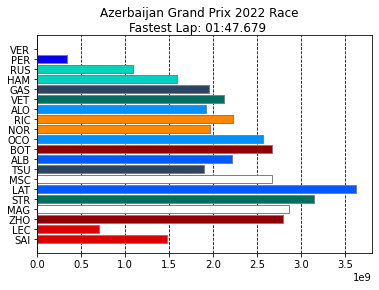

In [28]:
fig, ax = plt.subplots()
ax.barh(racepace_df.index, racepace_df['Delta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(racepace_df.index)
ax.set_yticklabels(racepace_df['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(fastest_pace, '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} {session.name}\n"
             f"Fastest Lap: {lap_time_string} ")
fig.savefig(path+session.event['EventName']+" racepace.jpg")

plt.show()

In [29]:
fig, ax = plt.subplots()

ax.barh(racepace_df.index, racepace_df['Delta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(racepace_df.index)
ax.set_yticklabels(racepace_df['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(fastest_pace, '%m:%s.%ms')

for i, v in enumerate(deltalist):
        ax.text(1, i+1.3, "+" +str(v),color = 'black', fontweight = 'bold')

plt.suptitle(f"{session.event['EventName']} {session.event.year} {session.name}\n"
             f"Fastest Lap: {lap_time_string} ")
fig.set_size_inches(16, 10)
fig.set_dpi(800)
fig.savefig(path+session.event['EventName']+" racepace.jpg",dpi=800)

plt.show()


In [36]:
vertime=laps.pick_driver("VER")
hamtime=laps.pick_driver("HAM")

In [37]:
medi=vertime.pick_tyre("MEDIUM")
medi2=hamtime.pick_tyre("MEDIUM")

In [38]:
medi=medi.pick_accurate()
medi2=medi2.pick_accurate()

In [40]:
medi


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:06:38.629000,1,0 days 00:01:48.954000,2,1,NaT,NaT,0 days 00:00:39.324000,0 days 00:00:44.058000,0 days 00:00:25.572000,...,False,MEDIUM,2.0,True,0 days 01:04:49.675000,Red Bull Racing,VER,1,True,2022-06-12 11:05:49.683
2,0 days 01:08:27.319000,1,0 days 00:01:48.690000,3,1,NaT,NaT,0 days 00:00:39.084000,0 days 00:00:44.010000,0 days 00:00:25.596000,...,False,MEDIUM,3.0,True,0 days 01:06:38.629000,Red Bull Racing,VER,1,True,2022-06-12 11:07:38.637
3,0 days 01:10:15.567000,1,0 days 00:01:48.248000,4,1,NaT,NaT,0 days 00:00:38.711000,0 days 00:00:44.142000,0 days 00:00:25.395000,...,False,MEDIUM,4.0,True,0 days 01:08:27.319000,Red Bull Racing,VER,1,True,2022-06-12 11:09:27.327
4,0 days 01:12:03.879000,1,0 days 00:01:48.312000,5,1,NaT,NaT,0 days 00:00:38.829000,0 days 00:00:44.115000,0 days 00:00:25.368000,...,False,MEDIUM,5.0,True,0 days 01:10:15.567000,Red Bull Racing,VER,1,True,2022-06-12 11:11:15.575
5,0 days 01:13:52.445000,1,0 days 00:01:48.566000,6,1,NaT,NaT,0 days 00:00:38.928000,0 days 00:00:44.225000,0 days 00:00:25.413000,...,False,MEDIUM,6.0,True,0 days 01:12:03.879000,Red Bull Racing,VER,1,True,2022-06-12 11:13:03.887
6,0 days 01:15:41.220000,1,0 days 00:01:48.775000,7,1,NaT,NaT,0 days 00:00:39.029000,0 days 00:00:44.349000,0 days 00:00:25.397000,...,False,MEDIUM,7.0,True,0 days 01:13:52.445000,Red Bull Racing,VER,1,True,2022-06-12 11:14:52.453
7,0 days 01:17:30.127000,1,0 days 00:01:48.907000,8,1,NaT,NaT,0 days 00:00:39.152000,0 days 00:00:44.366000,0 days 00:00:25.389000,...,False,MEDIUM,8.0,True,0 days 01:15:41.220000,Red Bull Racing,VER,1,True,2022-06-12 11:16:41.228
10,0 days 01:23:32.894000,1,0 days 00:01:48.416000,11,1,NaT,NaT,0 days 00:00:38.952000,0 days 00:00:43.799000,0 days 00:00:25.665000,...,False,MEDIUM,11.0,True,0 days 01:21:44.478000,Red Bull Racing,VER,1,True,2022-06-12 11:22:44.486
11,0 days 01:25:21.396000,1,0 days 00:01:48.502000,12,1,NaT,NaT,0 days 00:00:38.981000,0 days 00:00:43.908000,0 days 00:00:25.613000,...,False,MEDIUM,12.0,True,0 days 01:23:32.894000,Red Bull Racing,VER,1,True,2022-06-12 11:24:32.902
12,0 days 01:27:09.903000,1,0 days 00:01:48.507000,13,1,NaT,NaT,0 days 00:00:38.822000,0 days 00:00:44.020000,0 days 00:00:25.665000,...,False,MEDIUM,13.0,True,0 days 01:25:21.396000,Red Bull Racing,VER,2,True,2022-06-12 11:26:21.404


In [41]:
medi2

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
154,0 days 01:06:44.235000,44,0 days 00:01:50.521000,2,1,NaT,NaT,0 days 00:00:39.750000,0 days 00:00:44.816000,0 days 00:00:25.955000,...,False,MEDIUM,2.0,True,0 days 01:04:53.714000,Mercedes,HAM,1,True,2022-06-12 11:05:53.722
155,0 days 01:08:34.289000,44,0 days 00:01:50.054000,3,1,NaT,NaT,0 days 00:00:39.317000,0 days 00:00:44.754000,0 days 00:00:25.983000,...,False,MEDIUM,3.0,True,0 days 01:06:44.235000,Mercedes,HAM,1,True,2022-06-12 11:07:44.243
156,0 days 01:10:24.378000,44,0 days 00:01:50.089000,4,1,NaT,NaT,0 days 00:00:39.393000,0 days 00:00:44.725000,0 days 00:00:25.971000,...,False,MEDIUM,4.0,True,0 days 01:08:34.289000,Mercedes,HAM,1,True,2022-06-12 11:09:34.297
157,0 days 01:12:14.170000,44,0 days 00:01:49.792000,5,1,NaT,NaT,0 days 00:00:39.355000,0 days 00:00:44.689000,0 days 00:00:25.748000,...,False,MEDIUM,5.0,True,0 days 01:10:24.378000,Mercedes,HAM,1,True,2022-06-12 11:11:24.386
158,0 days 01:14:04.953000,44,0 days 00:01:50.783000,6,1,NaT,NaT,0 days 00:00:39.405000,0 days 00:00:44.886000,0 days 00:00:26.492000,...,False,MEDIUM,6.0,True,0 days 01:12:14.170000,Mercedes,HAM,1,True,2022-06-12 11:13:14.178
159,0 days 01:15:55.911000,44,0 days 00:01:50.958000,7,1,NaT,NaT,0 days 00:00:39.606000,0 days 00:00:45.122000,0 days 00:00:26.230000,...,False,MEDIUM,7.0,True,0 days 01:14:04.953000,Mercedes,HAM,1,True,2022-06-12 11:15:04.961
160,0 days 01:17:47.066000,44,0 days 00:01:51.155000,8,1,NaT,NaT,0 days 00:00:39.592000,0 days 00:00:45.249000,0 days 00:00:26.314000,...,False,MEDIUM,8.0,True,0 days 01:15:55.911000,Mercedes,HAM,1,True,2022-06-12 11:16:55.919
